# Import Pipelines

In [1]:
from question_answer.pipelines import (
    connect_to_document_store,
    get_preprocessing_pipeline,
    get_question_generation_pipeline,
    get_question_answering_pipeline
)

c:\Users\HP\Documents\2ite2\pfa\model\Question-generation-and-long-form-answers\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Connect to Vector DB

In [2]:
document_store = connect_to_document_store()

c:\Users\HP\Documents\2ite2\pfa\model\Question-generation-and-long-form-answers\venv\lib\site-packages\weaviate\warnings.py:121: DeprecationWarning: Dep005: You are using weaviate-client version 3.26.2. The latest version is 4.5.5.
            Please consider upgrading to the latest version. See https://weaviate.io/developers/weaviate/client-libraries/python for details.
  warnings.warn(


In [3]:
print(f'number of documents : {document_store.count_documents()}')

number of documents : 20


In [4]:
document_store.delete_documents(
    [doc.id for doc in document_store.filter_documents()])

# Preprocessing Pipeline

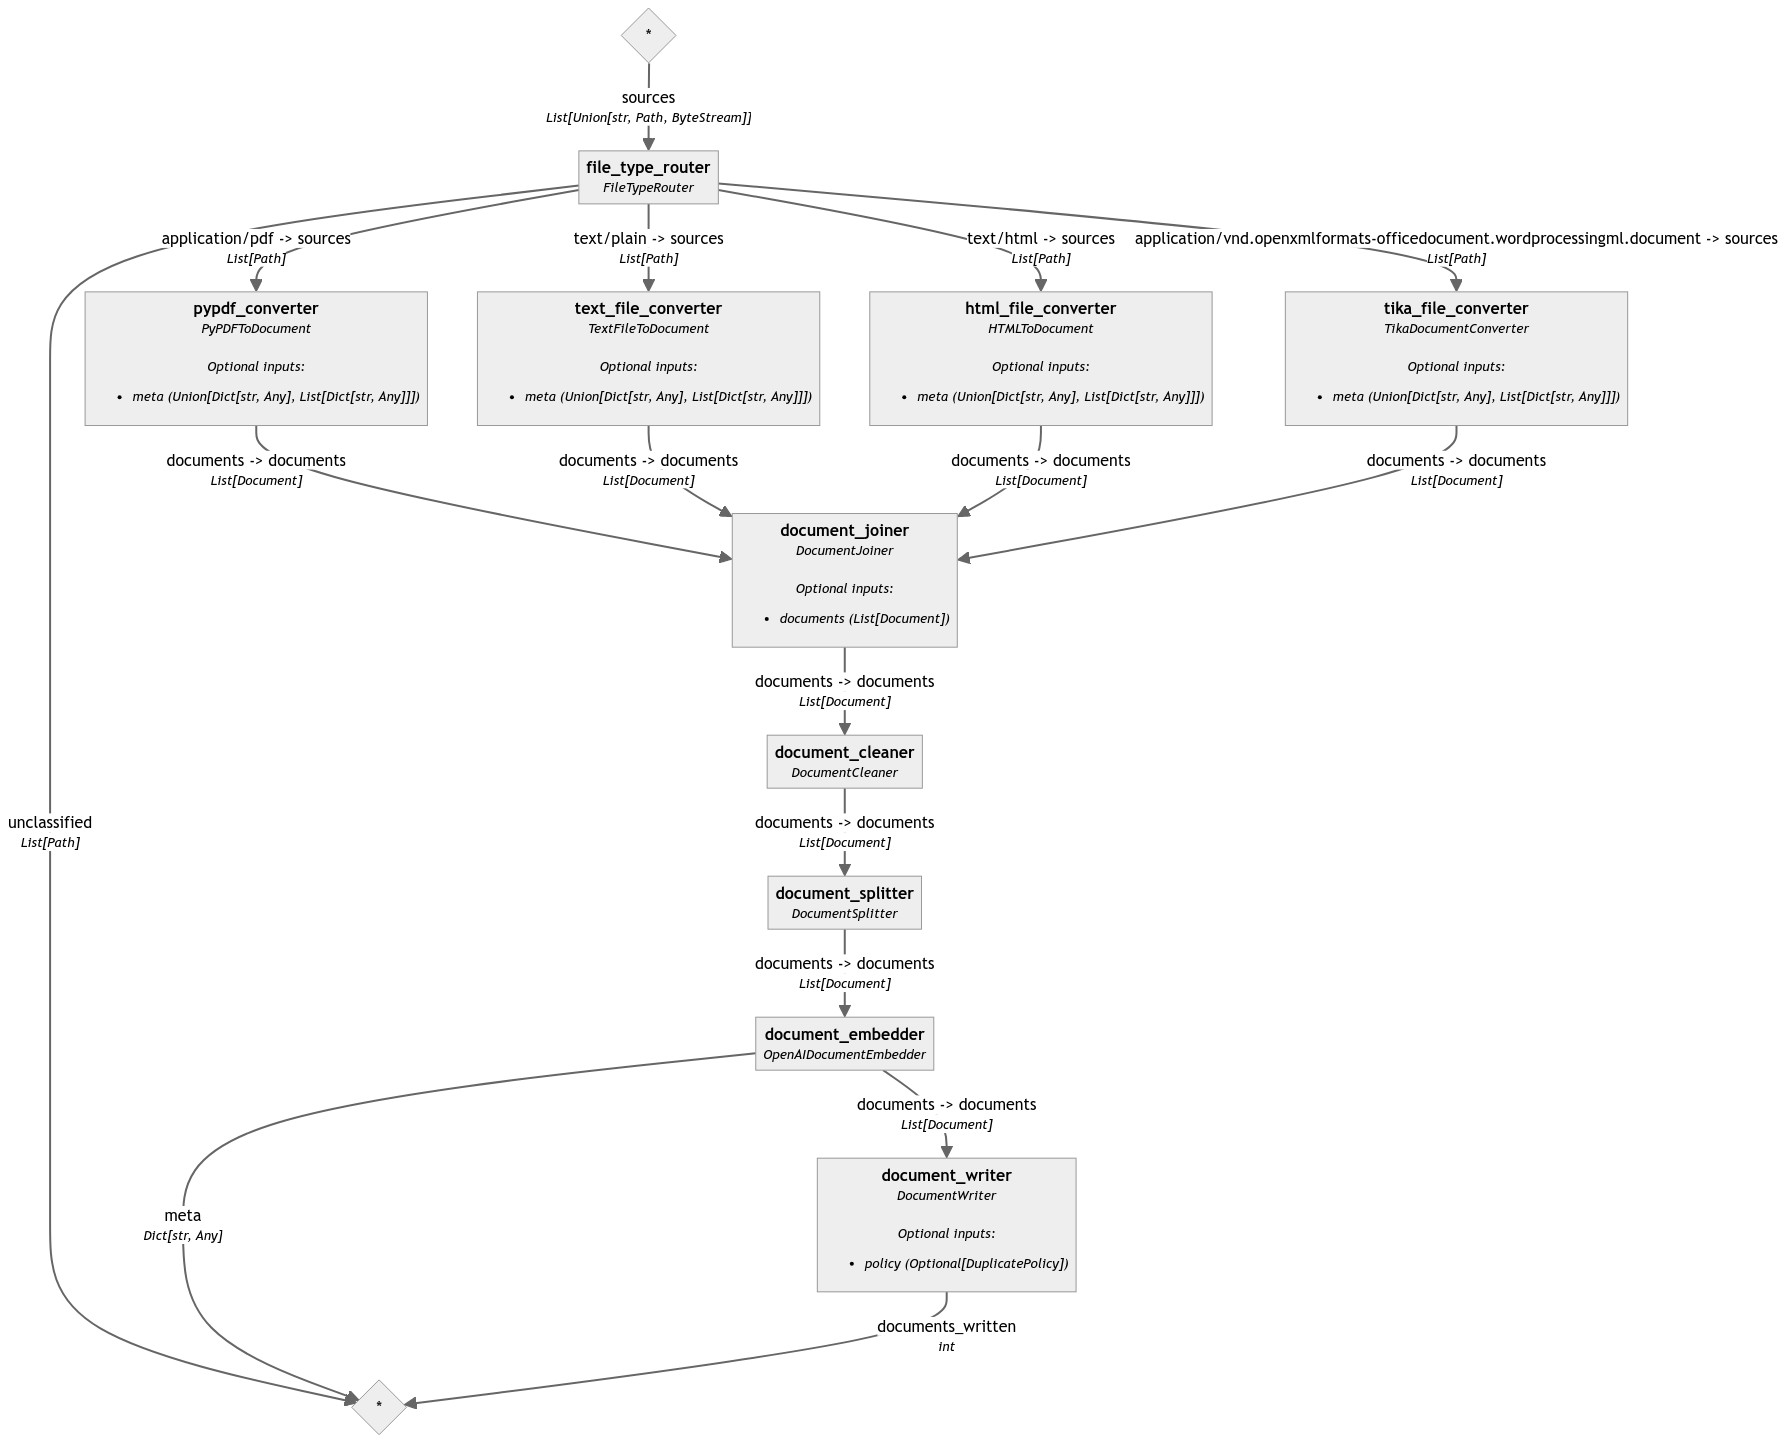

In [6]:
preprocessing_pipeline = get_preprocessing_pipeline(
    document_store,
    # use_ollama=True,
    use_openai=True
)
preprocessing_pipeline

In [7]:
res = preprocessing_pipeline.run(
    {
        "file_type_router": {
            "sources": [
                # "SDG.pdf",
                # "articles.pdf",
                "doc1.docx",
                "doc2.docx",
                # "index.html"
            ]
        }
    }
)

c:\Users\HP\Documents\2ite2\pfa\model\Question-generation-and-long-form-answers\venv\lib\site-packages\tika\tika.py:667: ResourceWarning: unclosed file <_io.TextIOWrapper name='nul' mode='w' encoding='cp1252'>
  _ = Popen(java_path, stdout=open(os.devnull, "w"), stderr=open(os.devnull, "w"))
2024-04-15 22:26:45,830 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-04-15 22:26:50,838 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
c:\Users\HP\Documents\2ite2\pfa\model\Question-generation-and-long-form-answers\venv\lib\site-packages\tika\tika.py:599: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\HP\\AppData\\Local\\Temp\\tika-server.log' mode='w' encoding='cp1252'>
  status = startServer(jarPath, TikaJava, TikaJavaArgs, serverHost, port, classpath, config_path)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\subprocess.py:1067: ResourceWarning: subprocess 8984 is still running
  _warn("subprocess %s is still ru

In [8]:
print(f'number of documents : {document_store.count_documents()}')
for doc in document_store.filter_documents():
    print(len(doc.content.split(' ')))

number of documents : 8
151
67
151
151
151
134
151
151


# Question Generation Pipeline

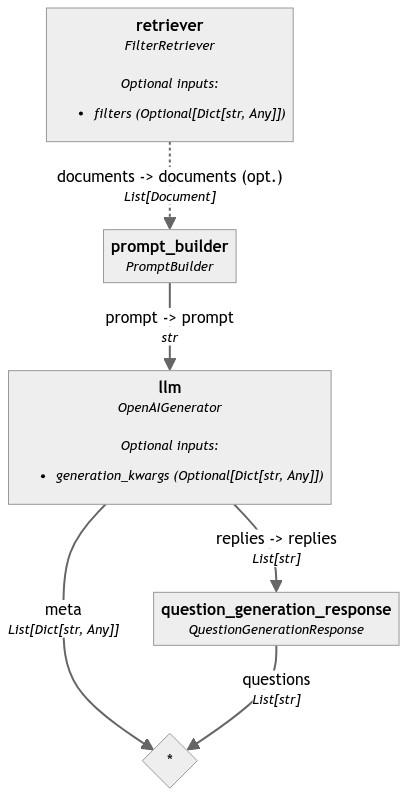

In [9]:
# model_name = "mistral-question-answering:latest"
model_name="llama2-question-answering:latest"
question_generation_pipline = get_question_generation_pipeline(
    document_store,
    use_openai=True
    # ollama_model_name = model_name
)
question_generation_pipline

In [10]:
res = question_generation_pipline.run({
    "retriever": {
        "filters": {}
    }
})
res['question_generation_response']['questions']

['How does supervised learning differ from unsupervised learning in terms of the type of data used for training and the presence of predefined labels?',
 'Can you explain the key differences between classification and regression tasks in supervised learning, along with examples of each?',
 'What are some common techniques used in unsupervised learning to identify hidden patterns or structures within unlabeled data?',
 'How does reinforcement learning differ from supervised and unsupervised learning, specifically in terms of how the model learns and improves its decision-making processes?',
 'What are some of the notable successes of deep learning in various fields, and how does it differ from traditional machine learning approaches?',
 'How has the adoption of AI and machine learning impacted industries such as healthcare, finance, transportation, and entertainment, leading to innovations in specific applications?',
 'What advantages does Python offer as a programming language, especia

# Question Answering Pipeline

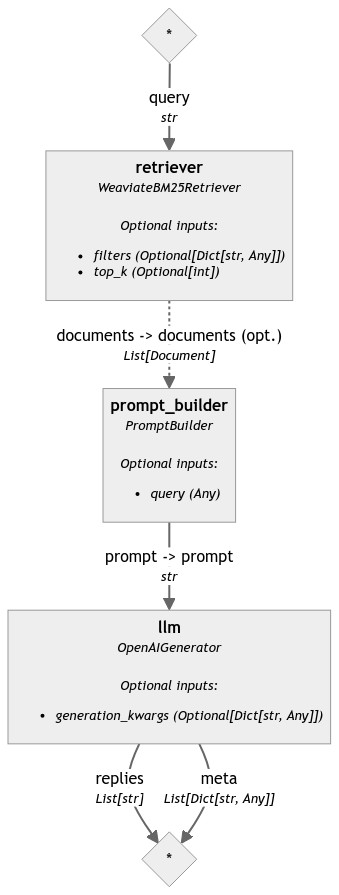

In [11]:
question = 'How does supervised learning differ from unsupervised learning in terms of training models?'
question_answering_pipline = get_question_answering_pipeline(
    document_store,
    # question,
    use_openai=True
    # ollama_model_name='mistral-question-answering:latest'
    # ollama_model_name='llama2-question-answering:latest'
)
question_answering_pipline

In [12]:
response = question_answering_pipline.run(
    {"prompt_builder": {"query": question}, "retriever": {"query": question}})
response

{'llm': {'replies': ['Supervised learning involves training a model on labeled data where each example is paired with a corresponding label or outcome, allowing the model to learn a mapping from input to output to make predictions on new, unseen data accurately. In contrast, unsupervised learning trains a model on unlabeled data, where there are no predefined labels or outcomes. The model must infer the underlying structure of the data on its own to identify hidden patterns or structures within the data.'],
  'meta': [{'model': 'gpt-3.5-turbo-0125',
    'index': 0,
    'finish_reason': 'stop',
    'usage': {'completion_tokens': 90,
     'prompt_tokens': 1570,
     'total_tokens': 1660}}]}}

In [13]:
print(response["llm"]["replies"][0])

Supervised learning involves training a model on labeled data where each example is paired with a corresponding label or outcome, allowing the model to learn a mapping from input to output to make predictions on new, unseen data accurately. In contrast, unsupervised learning trains a model on unlabeled data, where there are no predefined labels or outcomes. The model must infer the underlying structure of the data on its own to identify hidden patterns or structures within the data.
